## Healthcare Insurance Marketplace ##

### Introduction ###
In the United States, health insurance marketplaces, also called health exchanges, are organizations in each state through which people can purchase health insurance. People can purchase health insurance that complies with the **Patient Protection and Affordable Care Act** (ACA, known colloquially as "Obamacare") at ACA health exchanges, where they can choose from a range of government-regulated and standardized health care plans offered by the insurers participating in the exchange.

ACA health exchanges were fully certified and operational by January 1, 2014, under federal law.


In this excercise we would explore the data we have about the **Healthcare Insurance Marketplace** or simply **Exchange**. How many benefits in terms of plans are available to states. How campanies(insurance providers) have shown interest in Exchange. The average premiums for the different categoies have increased or decreased in last 5 years.

In [2]:
# This cell will be used for import. All the necessary packages and libraries will be imported.
# As the work on this project moves on, the required packages will be imported.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly.graph_objs import *
py.sign_in('vishalsona', 'BcxT29KwYubHGCZ3eqn3')
from ggplot import *
%matplotlib inline 


In [3]:
# setup the pandas to display all the columns of the dataframe.
pd.set_option('display.max_columns', None)

**Counting** something interesting.<br>
**Question 1:** What are the top 3 states with most number of medical services offered in the united states.

In [4]:
# we have ready to use dataset from the Data Wrangling unit. import the bcs dataset.
bcs = pd.read_csv("bcs.csv")

/Users/vishalshilpi/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (4,7,10) have mixed types. Specify dtype option on import or set low_memory=False.



In [5]:
# check basic info 
bcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7202371 entries, 0 to 7202370
Data columns (total 25 columns):
Unnamed: 0             int64
BenefitName            object
BusinessYear           int64
CoinsInnTier1          object
CoinsInnTier2          object
CoinsOutofNet          object
CopayInnTier1          object
CopayInnTier2          object
CopayOutofNet          object
EHBVarReason           object
Exclusions             object
Explanation            object
ImportDate             object
IsCovered              object
IsEHB                  object
IsExclFromInnMOOP      object
IsExclFromOonMOOP      object
IssuerId               int64
LimitQty               float64
LimitUnit              object
PlanId                 object
QuantLimitOnSvc        object
SourceName             object
StandardComponentId    object
StateCode              object
dtypes: float64(1), int64(3), object(21)
memory usage: 1.3+ GB


In [6]:
# drop the unwanted column
bcs.drop("Unnamed: 0", axis=1, inplace=True)

In [7]:
bcs.shape

(7202371, 24)

In [8]:
# Unique plan sold in the united states since the inception of Exchange: unique_plan
unique_plan = bcs.BenefitName.nunique()
print("Unique plan offered to Americans:",unique_plan)
print("Number of states participated in the Exchange program:",bcs.StateCode.nunique())

Unique plan offered to Americans: 964
Number of states participated in the Exchange program: 40


Over the period of 5 years, American were offered 964 unique benefits. Interestingly not all the 50 states have participated in the marketplace or Exchange. For example California, New york.<br>
States who are not participating in the federal run marketplace they have their own state run exchange. There are actually only 39 states who are using federal run health insurance marketplace. Idaho moved to state run marketplace after the first year of enrollment. And state run marketplace of Kentucky was dismentalled in year 2016 and joined federal run exchange. The above number 40 is the number of states who were/are associated with federal run exchange since its inception.

In [9]:
# Lets see how many benefits are available statewise.
bcs[['StateCode','BenefitName']].groupby('StateCode').count().sort_values('BenefitName')
uniq_state = bcs.StateCode.unique()
benefits = []

for state in uniq_state:
    state_benefit = len(bcs[bcs['StateCode'] == state])
    benefits.append(state_benefit)

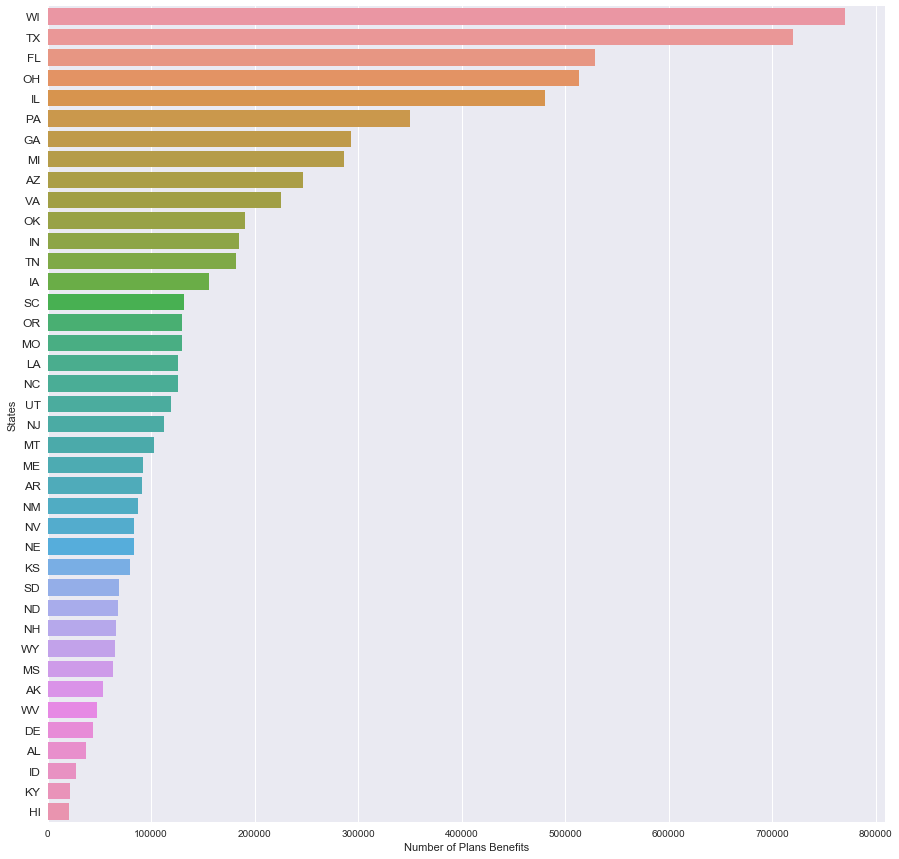

In [10]:
df = pd.DataFrame(
    {'state': uniq_state,
     'Count' : benefits
     })

df = df.sort_values("Count", ascending=False).reset_index(drop=True)

f, ax = plt.subplots(figsize=(15, 15)) 
ax.set_yticklabels(df.state, rotation='horizontal', fontsize='large')
g = sns.barplot(y = df.state, x= df.Count)
plt.ylabel('States')
plt.xlabel('Number of Plans Benefits')
plt.show()

In [11]:
print("Top 3 sates with highest number of medical services offered:")
df.head(5)

Top 3 sates with highest number of medical services offered:


,Count,state
0,769909,WI
1,719539,TX
2,528738,FL
3,513555,OH
4,480583,IL


**Answer 1:** As we can see from the graph above that there Wisconsin(WI) is the state where highest number of health benefit plans are offered, Texas(TX) is at number 2 and Florida(FL) at number 3. We can also see that the Hawai(HI) is at bottom of the list.

Find **Trends:** <br>
**Question 2:** How the number of companies(insurance providers) and number of plans offered by these companies are doing since the inception of ACA(Affordable Care Act) also known as Obama care.

To find out trend or pattern, regarding the number of service providers and palns offered by them we have to get the number of unique issuer and total number of plans offered by them for each state yearly. These numbers can be calculated using the column name "IssuerId" in the bcs dataframe. Let's start....

In [12]:
# check if the column I need "IssuerId is available
bcs.head(2)

,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,Explanation,ImportDate,IsCovered,IsEHB,IsExclFromInnMOOP,IsExclFromOonMOOP,IssuerId,LimitQty,LimitUnit,PlanId,QuantLimitOnSvc,SourceName,StandardComponentId,StateCode
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,Combined annual benefit maximum of $1000 per y...,2014-03-19 07:06:49,Covered,NaN,No,No,21989,1000.0,Dollars per Year,21989AK0010001-00,Yes,HIOS,21989AK0010001,AK
1,Dental Check-Up for Children,2014,20%,NaN,20%,No Charge,NaN,No Charge,Substantially Equal,NaN,See policy for additional limitations,2014-03-19 07:06:49,Covered,Yes,No,No,21989,1.0,Visit(s) per 6 Months,21989AK0010001-00,Yes,HIOS,21989AK0010001,AK


In [13]:
# create a dataframe with the required columns only: issuer
issuer = bcs[['BusinessYear','StateCode','IssuerId']]
issuer.head()

,BusinessYear,StateCode,IssuerId
0,2014,AK,21989
1,2014,AK,21989
2,2014,AK,21989
3,2014,AK,21989
4,2014,AK,21989


In [14]:
# groupby issuer dataframe by sataes and business years.
issuer = issuer.groupby(['StateCode','BusinessYear'])

In [15]:
# get all yearly data for each state with total number of unique service provides: unique_issuer
unique_issuer = issuer.IssuerId.nunique().unstack()

In [16]:
# print the dataframe
unique_issuer

BusinessYear,2014,2015,2016,2017,2018
StateCode,,,,,
AK,8.0,12.0,10.0,7.0,4.0
AL,9.0,16.0,16.0,11.0,7.0
AR,10.0,13.0,9.0,7.0,7.0
AZ,21.0,35.0,32.0,17.0,14.0
DE,9.0,12.0,12.0,9.0,4.0
FL,24.0,33.0,32.0,24.0,22.0
GA,16.0,30.0,31.0,21.0,17.0
HI,NaN,NaN,5.0,4.0,4.0
IA,11.0,17.0,17.0,15.0,7.0


In [17]:
# calculate total of each state over the span of 5 years and sort the dataframe. To do so will 
# add a new column 'Total' to the dataframe and later will drop it for better visualization
unique_issuer['Total']=unique_issuer[[2014, 2015, 2016, 2017, 2018]].sum(axis=1)

In [18]:
unique_issuer.head(2) # just to make sure that we have the new column.

BusinessYear,2014,2015,2016,2017,2018,Total
StateCode,,,,,,
AK,8.0,12.0,10.0,7.0,4.0,41.0
AL,9.0,16.0,16.0,11.0,7.0,59.0


In [19]:
# sorting the dataframe which has total number of unique issuer.
unique_issuer.sort_values(by=['Total'], ascending=True, inplace=True)

In [20]:
# drop the Total column to get better visualization.
unique_issuer.drop(['Total'], axis=1, inplace=True)

In [21]:
# print unique_issuer dataframe to make sure everything is in place. print tail of the datafram
# as it is sorted in ascending order.
unique_issuer.tail()

BusinessYear,2014,2015,2016,2017,2018
StateCode,,,,,
WI,22.0,37.0,36.0,28.0,20.0
PA,25.0,37.0,36.0,25.0,22.0
OH,21.0,38.0,41.0,28.0,26.0
MI,25.0,38.0,40.0,29.0,26.0
TX,27.0,40.0,44.0,30.0,27.0


#### Visualization using stacked bar plot ####
Let's plot this horizontal stacked bar so that we can asses all the states together and see how every year for each state numbers are doing.

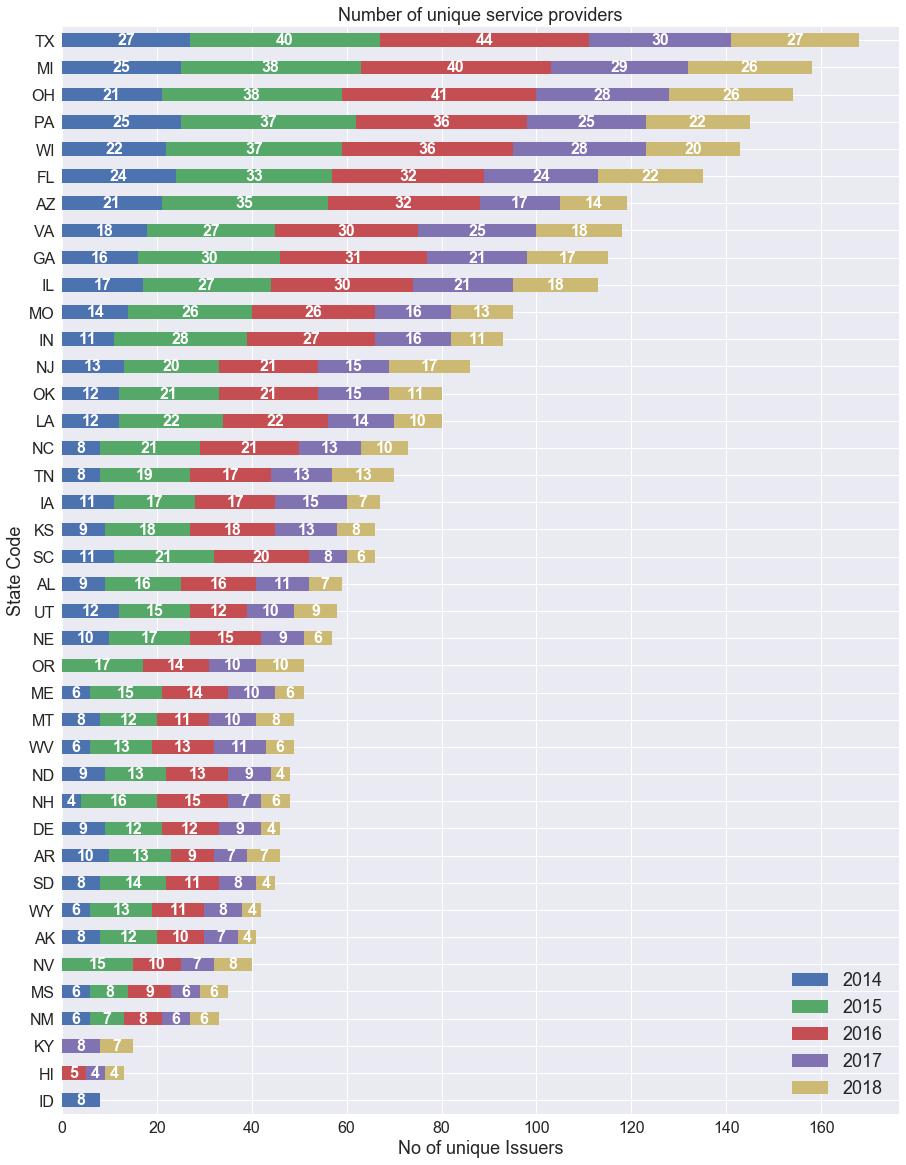

In [22]:
ax = unique_issuer.plot.barh(title="Number of unique service providers",
                             legend=True, figsize=(15,20), stacked=True, fontsize=16)
labels = []
for j in unique_issuer.columns:
    for i in unique_issuer.index:
        label = unique_issuer.loc[i][j]
        label = format(label, '.0f')
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center',
               fontsize=16, fontweight="bold", color="white")
plt.title("Number of unique service providers", fontsize=18 )
plt.xlabel("No of unique Issuers", fontsize=18)
plt.ylabel("State Code", fontsize=18)
plt.legend(fontsize=18)
plt.show()

**Answer 2**: We would have expected Wisconsin(WI) state to top this list as well with most number of service provides every year however this is not the case. It looks like there are fewer service provides who are providing more benefits in the Wisconsin. Same is the case with Florida which was on 3rd position in the number of benefits offered.<br>
<br>
**Further Investigation**: It would be interesting to see the ratio of number of unique service providers and total number of plans offered by these companies in each states. If the ratio is small then we would expect the monthly rate to be higher. This can be hypothetical question and can be investigeted.<br>
<br>
Another interesting pattern is, after the inception of exchange in the year 2014, the number of service providers in each participating states were increasing or were same for the year 2015 and 2016. In some states these numbers were decrease by very small numbers. But it has started to fall down in year 2017 and by the year 2018 these numbers were significantly dropped. This can be explained by the fact that Fedral Governmnet has changed late 2016 and we all know that ACA was in jeopardy. Hence service provides would have thought of getting themsef as distant as possible. 

Let's visualize the overall increase and decrease in the number of service providers who were first very enthusiastic about the exchange but last couple of years showing very little to no interest in Health Insurance Marketplace.

In [23]:
unique_issuer_all = unique_issuer.sum()

In [25]:
print(unique_issuer_all)

BusinessYear
2014    450.0
2015    783.0
2016    770.0
2017    543.0
2018    432.0
dtype: float64


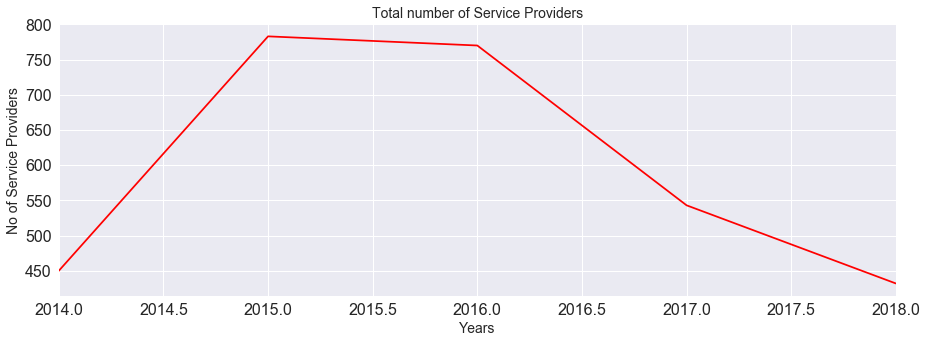

In [26]:
# plot to show the Increase/Descrease of numbers of service provides in the USA.
unique_issuer_all.plot(figsize=(15, 5), fontsize = 16, color="R")
plt.title("Total number of Service Providers", fontsize=14)
plt.xlabel("Years", fontsize = 14)
plt.ylabel("No of Service Providers", fontsize = 14)
plt.show()

**Conclusion:** This gives us better visuals of how the number of service providers first increased they statyed almost same for the next year and then the big fall started. From year 2016 to 2017 there were approximately **30%** less service providers selling insurance through exchange, **20%** more declined into year 2018.

**Question 3**: How the monthly premium rates are doing over the years in the exchange?<br>
<br>
To answer this question we have to use rate dataset. Clean and formatted data is available in csv form from the last unit(Data Wringling). We just have to import the csv file and do some cleaning  so that we use only the columns and data which is required for this analysis.

In [ ]:
# import the rates dataset into pandas dataframe: rates
rates = pd.read_csv("merged_rates.csv")

In [113]:
# look at the data set
rates.head()

,Unnamed: 0,Age,BusinessYear,Couple,CoupleAndOneDependent,CoupleAndThreeOrMoreDependents,CoupleAndTwoDependents,FederalTIN,ImportDate,IndividualRate,IndividualTobaccoRate,IssuerId,PlanId,PrimarySubscriberAndOneDependent,PrimarySubscriberAndThreeOrMoreDependents,PrimarySubscriberAndTwoDependents,RateEffectiveDate,RateExpirationDate,RatingAreaId,SourceName,StateCode,Tobacco
0,0,0-20,2014,NaN,NaN,NaN,NaN,93-0438772,2014-03-19 07:06:49,29.00,NaN,21989,21989AK0010001,NaN,NaN,NaN,2014-01-01,2014-12-31,Rating Area 1,HIOS,AK,No Preference
1,1,Family Option,2014,73.9,144.56,144.56,144.56,93-0438772,2014-03-19 07:06:49,36.95,NaN,21989,21989AK0020001,107.61,107.61,107.61,2014-01-01,2014-12-31,Rating Area 1,HIOS,AK,No Preference
2,2,Family Option,2014,73.9,144.56,144.56,144.56,93-0438772,2014-03-19 07:06:49,36.95,NaN,21989,21989AK0020001,107.61,107.61,107.61,2014-01-01,2014-12-31,Rating Area 2,HIOS,AK,No Preference
3,3,21,2014,NaN,NaN,NaN,NaN,93-0438772,2014-03-19 07:06:49,32.00,NaN,21989,21989AK0010001,NaN,NaN,NaN,2014-01-01,2014-12-31,Rating Area 1,HIOS,AK,No Preference
4,4,22,2014,NaN,NaN,NaN,NaN,93-0438772,2014-03-19 07:06:49,32.00,NaN,21989,21989AK0010001,NaN,NaN,NaN,2014-01-01,2014-12-31,Rating Area 1,HIOS,AK,No Preference


In [114]:
# drop the columns which are not required for this project: rate_cols_drop
rate_cols_drop = ['FederalTIN','ImportDate','Tobacco','SourceName','RatingAreaId',
                  'RateExpirationDate','RateEffectiveDate','PlanId','IssuerId','Unnamed: 0']
rates.drop(rate_cols_drop, axis=1, inplace=True)

In [135]:
# check the rate dataframe to make sure we have all the columns required.
rates.head()

,Couple,CoupleAndOneDependent,CoupleAndThreeOrMoreDependents,CoupleAndTwoDependents,IndividualRate,IndividualTobaccoRate,PrimarySubscriberAndOneDependent,PrimarySubscriberAndThreeOrMoreDependents,PrimarySubscriberAndTwoDependents
BusinessYear,,,,,,,,,
2014,48.058457,70.810031,113.837471,89.938201,321.517159,559.615174,48.576332,91.842005,67.929215
2015,51.292121,77.654867,110.217921,93.125451,309.767086,525.566058,52.628882,92.894423,75.856385
2016,45.080843,69.204185,102.037017,84.512777,317.313491,547.585862,47.857884,84.644769,67.201083
2017,52.289979,84.042780,93.118987,88.586147,300.241364,618.247897,60.259526,70.277254,65.717807
2018,53.623583,93.325210,111.299425,102.321031,316.442360,746.333744,63.906711,84.000996,74.994502


In [134]:
rates.describe()

,Couple,CoupleAndOneDependent,CoupleAndThreeOrMoreDependents,CoupleAndTwoDependents,IndividualRate,IndividualTobaccoRate,PrimarySubscriberAndOneDependent,PrimarySubscriberAndThreeOrMoreDependents,PrimarySubscriberAndTwoDependents
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,50.068997,79.007415,106.102164,91.696721,313.056292,599.469747,54.645867,84.731889,70.339799
std,3.463663,9.943389,8.498150,6.695042,8.309884,88.971529,7.145988,9.036855,4.720282
min,45.080843,69.204185,93.118987,84.512777,300.241364,525.566058,47.857884,70.277254,65.717807
25%,48.058457,70.810031,102.037017,88.586147,309.767086,547.585862,48.576332,84.000996,67.201083
50%,51.292121,77.654867,110.217921,89.938201,316.442360,559.615174,52.628882,84.644769,67.929215
75%,52.289979,84.042780,111.299425,93.125451,317.313491,618.247897,60.259526,91.842005,74.994502
max,53.623583,93.325210,113.837471,102.321031,321.517159,746.333744,63.906711,92.894423,75.856385


As we know from data wrangling part that there are some other age category avaialable for the year 2017 and 2018. So we will have records only with the same age group. Also we must include Family Option in the age group becuase it is required for the calculation of monthly premium for the category other than Individual and Individual Tobacco rate.

In [120]:
# create a list of group of ages: age_grp_fmly
age_grp_fmly = ['0-20','Family Option', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
                  '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41',
                  '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52',
                  '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63',
                  '64', '65 and over']

In [122]:
# make sure that the age column has required kind of data.
rates = rates[rates.Age.isin(age_grp_fmly)]
rates.Age.unique()

array(['0-20', 'Family Option', '21', '22', '23', '24', '25', '26', '27',
       '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65 and over'], dtype=object)

In [125]:
# check what kind of values the float type columns have if there is some anamolies.
rates.describe()

,BusinessYear,Couple,CoupleAndOneDependent,CoupleAndThreeOrMoreDependents,CoupleAndTwoDependents,IndividualRate,IndividualTobaccoRate,PrimarySubscriberAndOneDependent,PrimarySubscriberAndThreeOrMoreDependents,PrimarySubscriberAndTwoDependents
count,1.772236e+07,45655.000000,45655.000000,45655.000000,45655.000000,1.772236e+07,6.017862e+06,45655.000000,45655.000000,45655.000000
mean,2.015700e+03,48.588372,74.235347,106.858970,89.397798,3.030908e+03,5.664284e+02,51.026085,87.859103,70.439467
std,1.281072e+00,30.719401,50.043669,73.088531,59.807102,5.184424e+04,3.114721e+02,30.910585,57.266721,44.490258
min,2.014000e+03,0.000000,0.000000,0.000000,0.000000,0.000000e+00,4.173000e+01,0.000000,0.000000,0.000000
25%,2.015000e+03,27.150000,29.050000,29.740000,29.050000,2.746000e+01,3.492500e+02,27.800000,29.660000,29.035000
50%,2.016000e+03,49.000000,77.170000,113.170000,95.890000,2.813800e+02,4.808300e+02,51.320000,95.270000,73.190000
75%,2.017000e+03,70.590000,111.760000,167.600000,137.050000,4.873100e+02,7.127600e+02,72.930000,135.485000,107.725000
max,2.018000e+03,182.400000,261.140000,449.140000,339.310000,9.999990e+05,6.604610e+03,175.060000,357.940000,251.740000


Everything looks good except that the Individual rate max is  99999 which is not right. We have to get rid to those columns as they may be wrong or unknow values.

In [126]:
# rows with individual rate with more than 9000 will be deleted.
rates = rates[rates['IndividualRate'] < 9000]

In [127]:
# just to make sure that the individual rate max is now with the correct value
rates.IndividualRate.max()

5503.8500000000004

In [128]:
# store the intermediate dataframe into csv file.
rates.to_csv('rate_story_telling.csv')

In [144]:
# I had to import this file as I had memory issue.
rates= pd.read_csv('rate_story_telling.csv').drop(['Unnamed: 0'],axis=1)

/Users/vishalshilpi/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.



In [145]:
rates.head()

,Age,BusinessYear,Couple,CoupleAndOneDependent,CoupleAndThreeOrMoreDependents,CoupleAndTwoDependents,IndividualRate,IndividualTobaccoRate,PrimarySubscriberAndOneDependent,PrimarySubscriberAndThreeOrMoreDependents,PrimarySubscriberAndTwoDependents,StateCode
0,0-20,2014,NaN,NaN,NaN,NaN,29.00,NaN,NaN,NaN,NaN,AK
1,Family Option,2014,73.9,144.56,144.56,144.56,36.95,NaN,107.61,107.61,107.61,AK
2,Family Option,2014,73.9,144.56,144.56,144.56,36.95,NaN,107.61,107.61,107.61,AK
3,21,2014,NaN,NaN,NaN,NaN,32.00,NaN,NaN,NaN,NaN,AK
4,22,2014,NaN,NaN,NaN,NaN,32.00,NaN,NaN,NaN,NaN,AK


In [146]:
# group by the rate dataframe into years 
rates = rates.groupby('BusinessYear')

In [147]:
# unstack the mean for each category yearwise and to convert the rates groupby dataframe to
# dataframe
rates = rates.mean() #.unstack()

In [149]:
# print the dataframe
#rates.unstack()
rates

,Couple,CoupleAndOneDependent,CoupleAndThreeOrMoreDependents,CoupleAndTwoDependents,IndividualRate,IndividualTobaccoRate,PrimarySubscriberAndOneDependent,PrimarySubscriberAndThreeOrMoreDependents,PrimarySubscriberAndTwoDependents
BusinessYear,,,,,,,,,
2014,48.058457,70.810031,113.837471,89.938201,321.517159,559.615174,48.576332,91.842005,67.929215
2015,51.292121,77.654867,110.217921,93.125451,309.767086,525.566058,52.628882,92.894423,75.856385
2016,45.080843,69.204185,102.037017,84.512777,317.313491,547.585862,47.857884,84.644769,67.201083
2017,52.289979,84.042780,93.118987,88.586147,300.241364,618.247897,60.259526,70.277254,65.717807
2018,53.623583,93.325210,111.299425,102.321031,316.442360,746.333744,63.906711,84.000996,74.994502


Let's visualize with the line plot to check if the rates have become cheaper or costlier

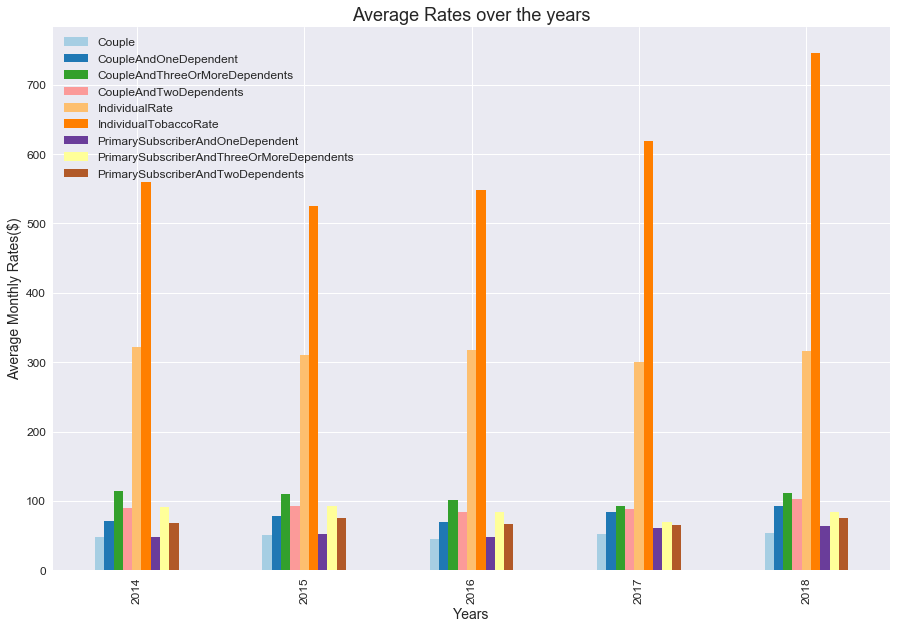

In [208]:
# Plot the above dataframe
rates.plot(kind='bar',figsize=(15, 10), fontsize="large", grid=True, colormap='Paired')
plt.title('Average Rates over the years', fontsize=18)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Average Monthly Rates($)", fontsize=14)
plt.legend(fontsize='large', loc='upper left')
plt.show()

From the above group bar chard it is not very clear wheather the premium rate is increase or decreased or no change except the Individual Tobacco Rate, which decreased from the first year in year 2015 but kept on increasing thereafter. From year 2017 to 2018 there is an increase of more than $100 which is pretty high.<br>
To check the average monthly premium of other category lets try to plot individual line plot of each category.

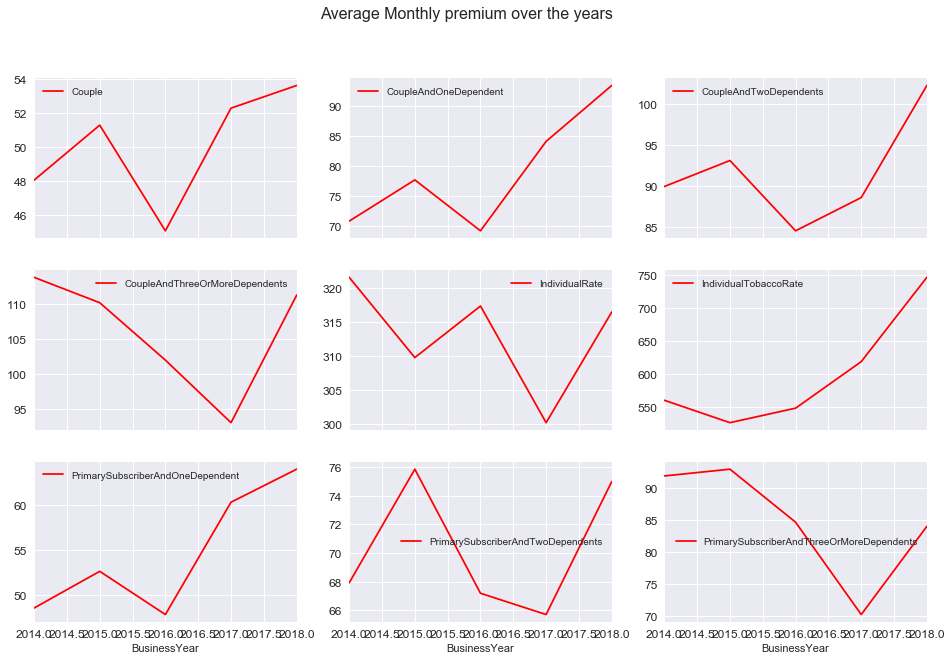

In [194]:
fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, figsize=(16,10))
plt.suptitle("Average Monthly premium over the years", fontsize=16)
rates.Couple.plot(ax=axes[0,0], legend=True, color="r", fontsize=12)
rates.CoupleAndOneDependent.plot(ax=axes[0,1], legend=True, color="r", fontsize=12)
rates.CoupleAndTwoDependents.plot(ax=axes[0,2], legend=True, color="r", fontsize=12)
rates.CoupleAndThreeOrMoreDependents.plot(ax=axes[1,0], legend=True, color="r", fontsize=12)
rates.IndividualRate.plot(ax=axes[1,1], legend=True, color="r", fontsize=12)
rates.IndividualTobaccoRate.plot(ax=axes[1,2], legend=True, color="r", fontsize=12)
rates.PrimarySubscriberAndOneDependent.plot(ax=axes[2,0], legend=True, color="r", fontsize=12)
rates.PrimarySubscriberAndTwoDependents.plot(ax=axes[2,1], legend=True, color="r", fontsize=12)
rates.PrimarySubscriberAndThreeOrMoreDependents.plot(ax=axes[2,2], legend=True, color="r", 
                                                     fontsize=12)
#fig.tight_layout()
#fig=axes[0,0].figure
#fig.text(0.5,0.04, "Years", ha="center", va="center")
#fig.text(0.05,0.5, "Avg Premium per Month ", ha="center", va="center", rotation=90)
plt.show()

**Answer 3**: As per the above graph we can see except for the individual tobacco rate, all other category has range of approximately $5 - $25 fluctuation since the inception of ACA(Affordable Care Act).

**Conclusion**: The monthly premium rates has not been increased or decreased signficantly for all the category except for the **individual tobacco rate**. It has increased approximately around $200 since the inception of marketplace or exchange.<br>
<br>
Further investigation on how are the rates doing in each state would be intersting. We would be able to find which is the cheapest and costiest state in terms of premiums.